In [16]:
import pandas as pd
from PIL import Image

## pd.concat - 데이터베이스 합치기

In [4]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 'B': ['B0', 'B1', 'B2', 'B3'],   'C': ['C0', 'C1', 'C2', 'C3']}, index=[0, 1,2,3])
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'], 'B': ['B4', 'B5', 'B6', 'B7'], 'C': ['C4', 'C5', 'C6', 'C7']}, index=[3,4,5,6])
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'], 'B': ['B8', 'B9', 'B10', 'B11'], 'C': ['C8', 'C9', 'C10', 'C11']}, index=[0,1,2,3])

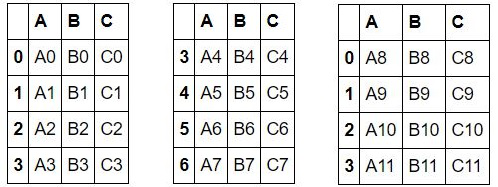

In [17]:
Image.open('df_example.jpg')

#### 데이터 프레임들을 항상 리스트로 만들어 입력
#### 기본은 row 단위로, axis 설정으로 컬럼으로 변경 가능

In [5]:
pd.concat([df1,df2,df3]) # default는 컬럼 기준 -> row를 이어붙인다

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3
3,A4,B4,C4
4,A5,B5,C5
5,A6,B6,C6
6,A7,B7,C7
0,A8,B8,C8
1,A9,B9,C9


In [6]:
pd.concat([df1,df2,df3], axis=1) # row 기준으로 -> 컬럼을 이어붙인다

,A,B,C,A,B,C,A,B,C
0,A0,B0,C0,NaN,NaN,NaN,A8,B8,C8
1,A1,B1,C1,NaN,NaN,NaN,A9,B9,C9
2,A2,B2,C2,NaN,NaN,NaN,A10,B10,C10
3,A3,B3,C3,A4,B4,C4,A11,B11,C11
4,NaN,NaN,NaN,A5,B5,C5,NaN,NaN,NaN
5,NaN,NaN,NaN,A6,B6,C6,NaN,NaN,NaN
6,NaN,NaN,NaN,A7,B7,C7,NaN,NaN,NaN


#### ignore_index : index를 다시 0부터 정렬한다.

In [7]:
pd.concat([df1,df2,df3], ignore_index=True)

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3
4,A4,B4,C4
5,A5,B5,C5
6,A6,B6,C6
7,A7,B7,C7
8,A8,B8,C8
9,A9,B9,C9


#### join : 'inner' - 공통된 부분만 합친다

In [8]:
df3.rename(columns={'C':'Z'}, inplace=True) # df3의 C 컬럼을 Z로 변경
pd.concat([df1,df2,df3], join='inner') # C가 df3에 없으므로 무시

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
3,A4,B4
4,A5,B5
5,A6,B6
6,A7,B7
0,A8,B8
1,A9,B9


#### 참고 : [ DataFrame ].append - 빈 데이터프레임에도 가능 

In [9]:
df1.append(df2, ignore_index=True)

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3
4,A4,B4,C4
5,A5,B5,C5
6,A6,B6,C6
7,A7,B7,C7


## pd.merge - 데이터베이스 JOIN을 구현

In [10]:
data1 = [{'name': 'kevin', 'score':70, 'subject':'math'}, {'name': 'terry', 'score':80, 'subject':'english'}, \
         {'name': 'kevin', 'score':90, 'subject':'english'},{'name': 'terry', 'score':60, 'subject':'math'}]
data2 = [{'name':'kevin','age':23}, {'name':'terry','age':24}, {'name':'john','age':30}]
df1 = pd.DataFrame.from_dict(data1)
df2 = pd.DataFrame.from_dict(data2)

![merge_example](merge_example.jpg)

### how : JOIN 방법 ( left, right, inner, outer ) , on :  기준 컬럼

#### 기본적으로 컬럼명이 같을 경우

In [11]:
pd.merge(df1, df2, how='inner', on=['name'])

,name,score,subject,age
0,kevin,70,math,23
1,kevin,90,english,23
2,terry,80,english,24
3,terry,60,math,24


In [12]:
pd.merge(df1,df2, how='right', on=['name'])

,name,score,subject,age
0,kevin,70.0,math,23
1,kevin,90.0,english,23
2,terry,80.0,english,24
3,terry,60.0,math,24
4,john,NaN,NaN,30


In [13]:
pd.merge(df1,df2, how='outer') # full outer join

,name,score,subject,age
0,kevin,70.0,math,23
1,kevin,90.0,english,23
2,terry,80.0,english,24
3,terry,60.0,math,24
4,john,NaN,NaN,30


#### value의 의미는 같지만 컬럼명이 다른 경우

In [14]:
df2.rename(columns={'name':'id'},inplace=True) # name 컬럼을 id로 변경
df2

,age,id
0,23,kevin
1,24,terry
2,30,john


In [15]:
# left_on : df1의 컬럼명, right_on : df2의 컬럼명
pd.merge(df1, df2, left_on='name', right_on='id', how='inner')

,name,score,subject,age,id
0,kevin,70,math,23,kevin
1,kevin,90,english,23,kevin
2,terry,80,english,24,terry
3,terry,60,math,24,terry
